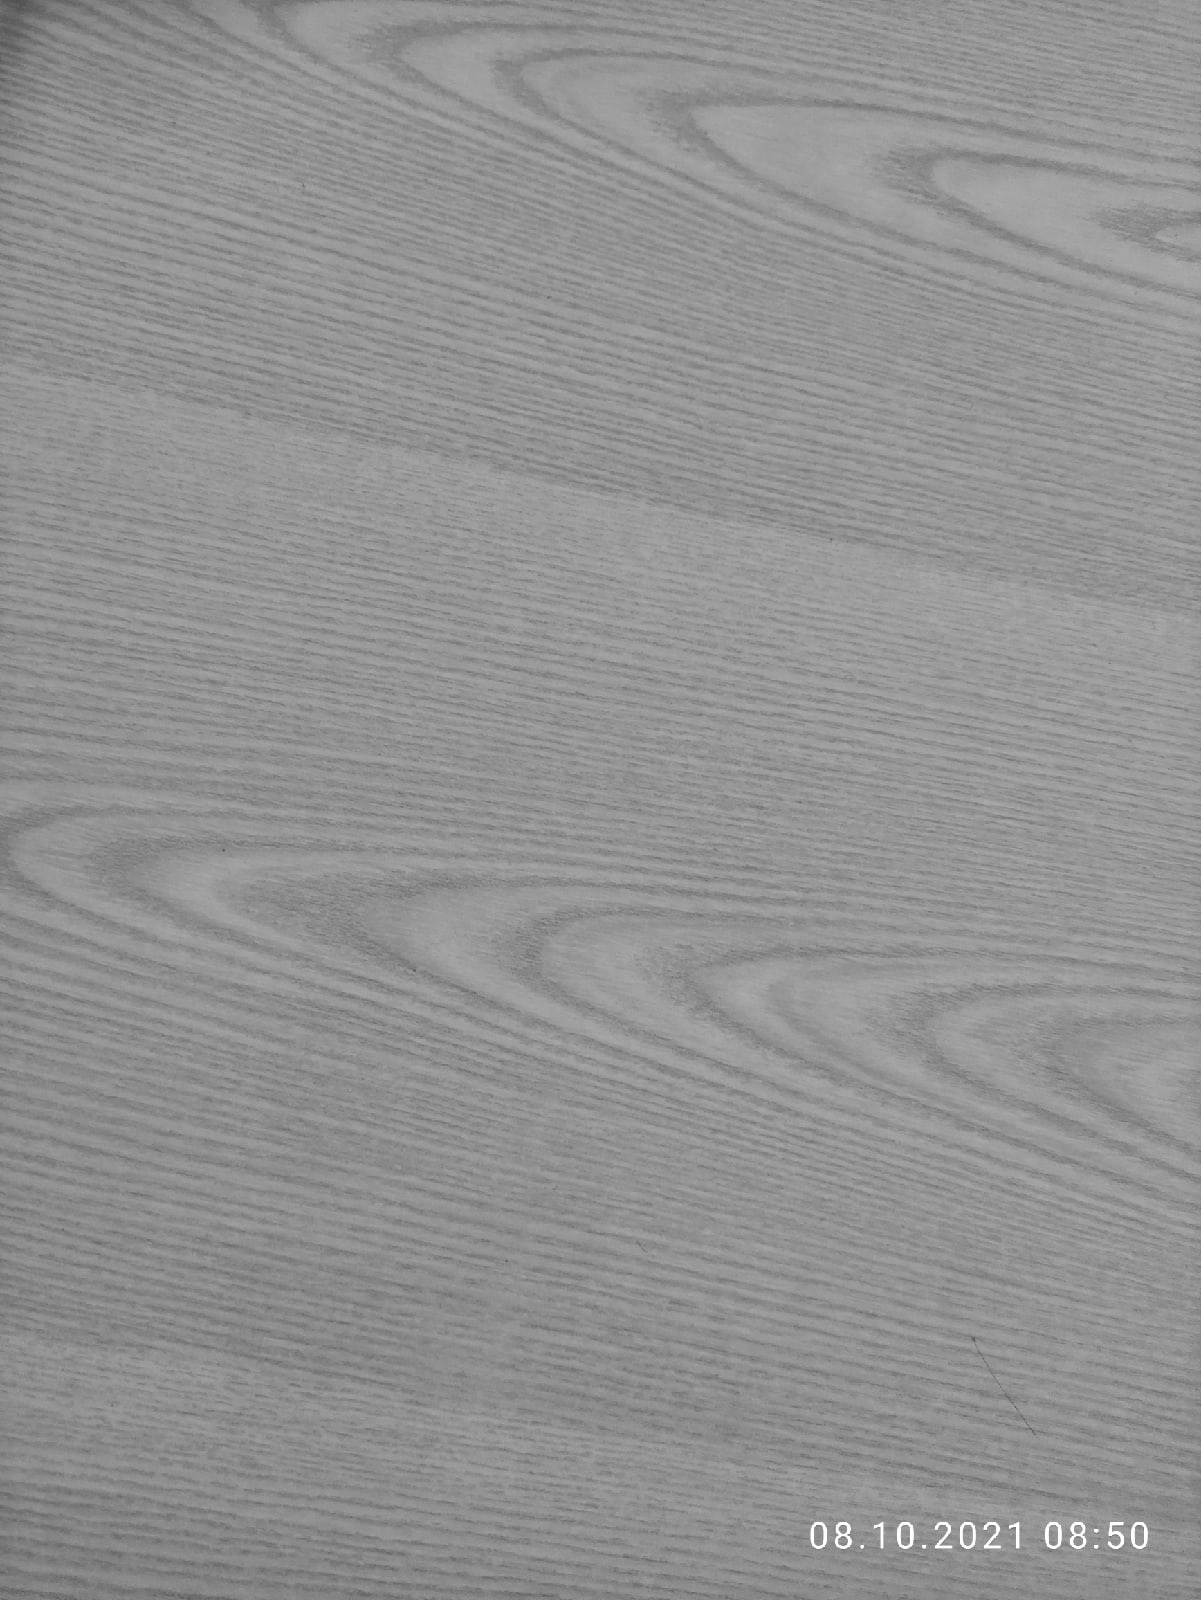

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np

before = io.imread('1.jpeg')
before = cv.cvtColor(before, cv.COLOR_BGR2GRAY)
cv2_imshow(before)

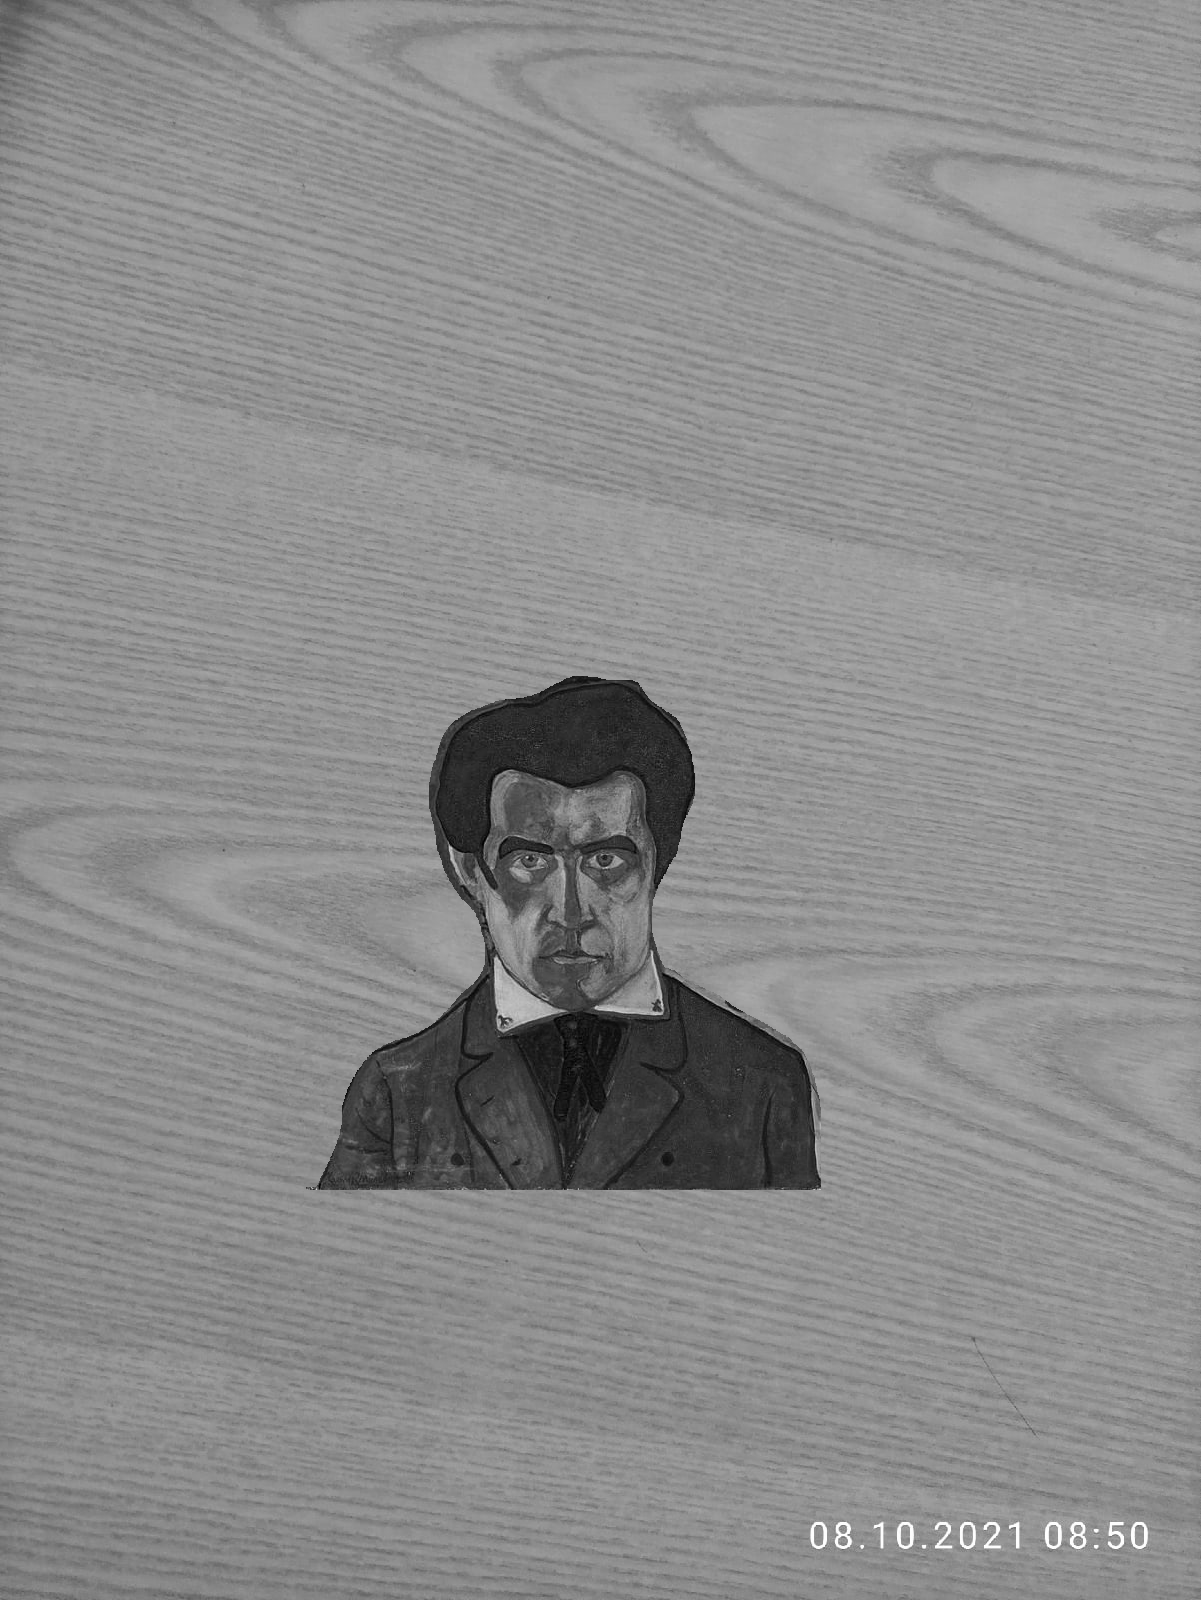

In [3]:
after = io.imread('2.jpg')
after = cv.cvtColor(after, cv.COLOR_BGR2GRAY)
cv2_imshow(after)

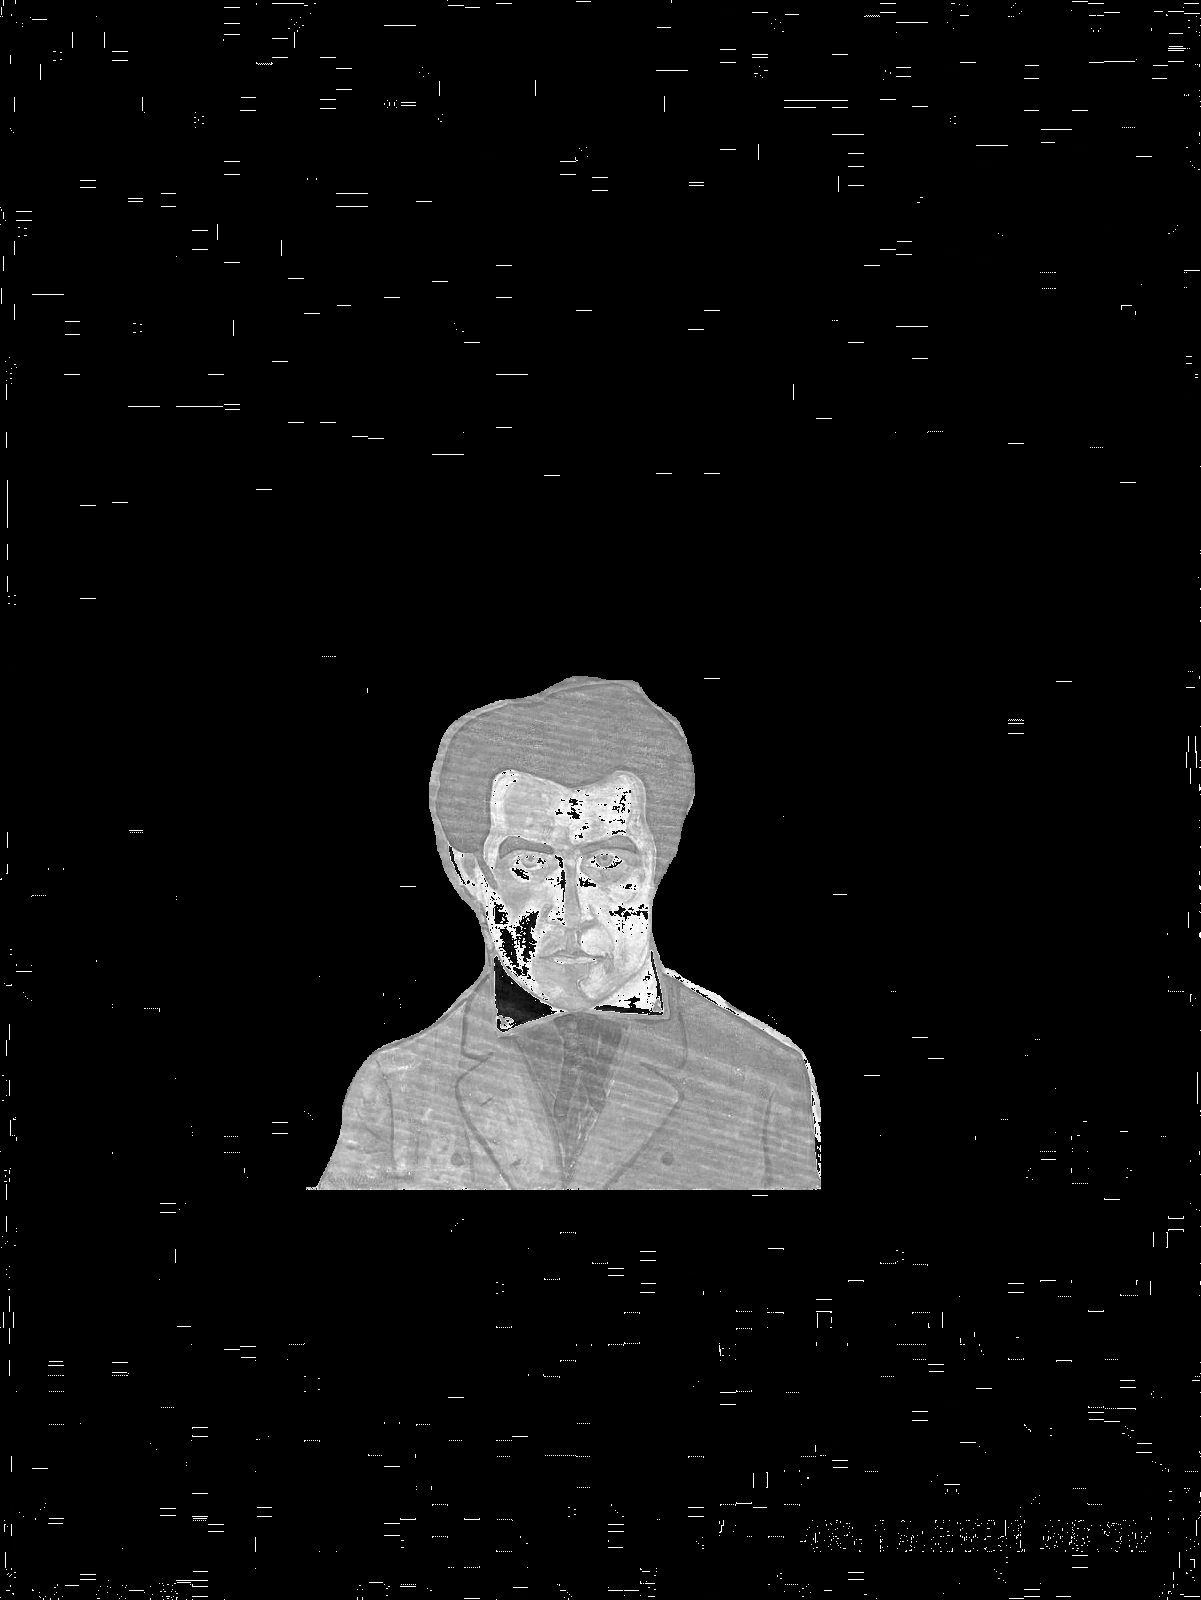

In [4]:
diff_abs = abs(after - before)
cv2_imshow(diff_abs)

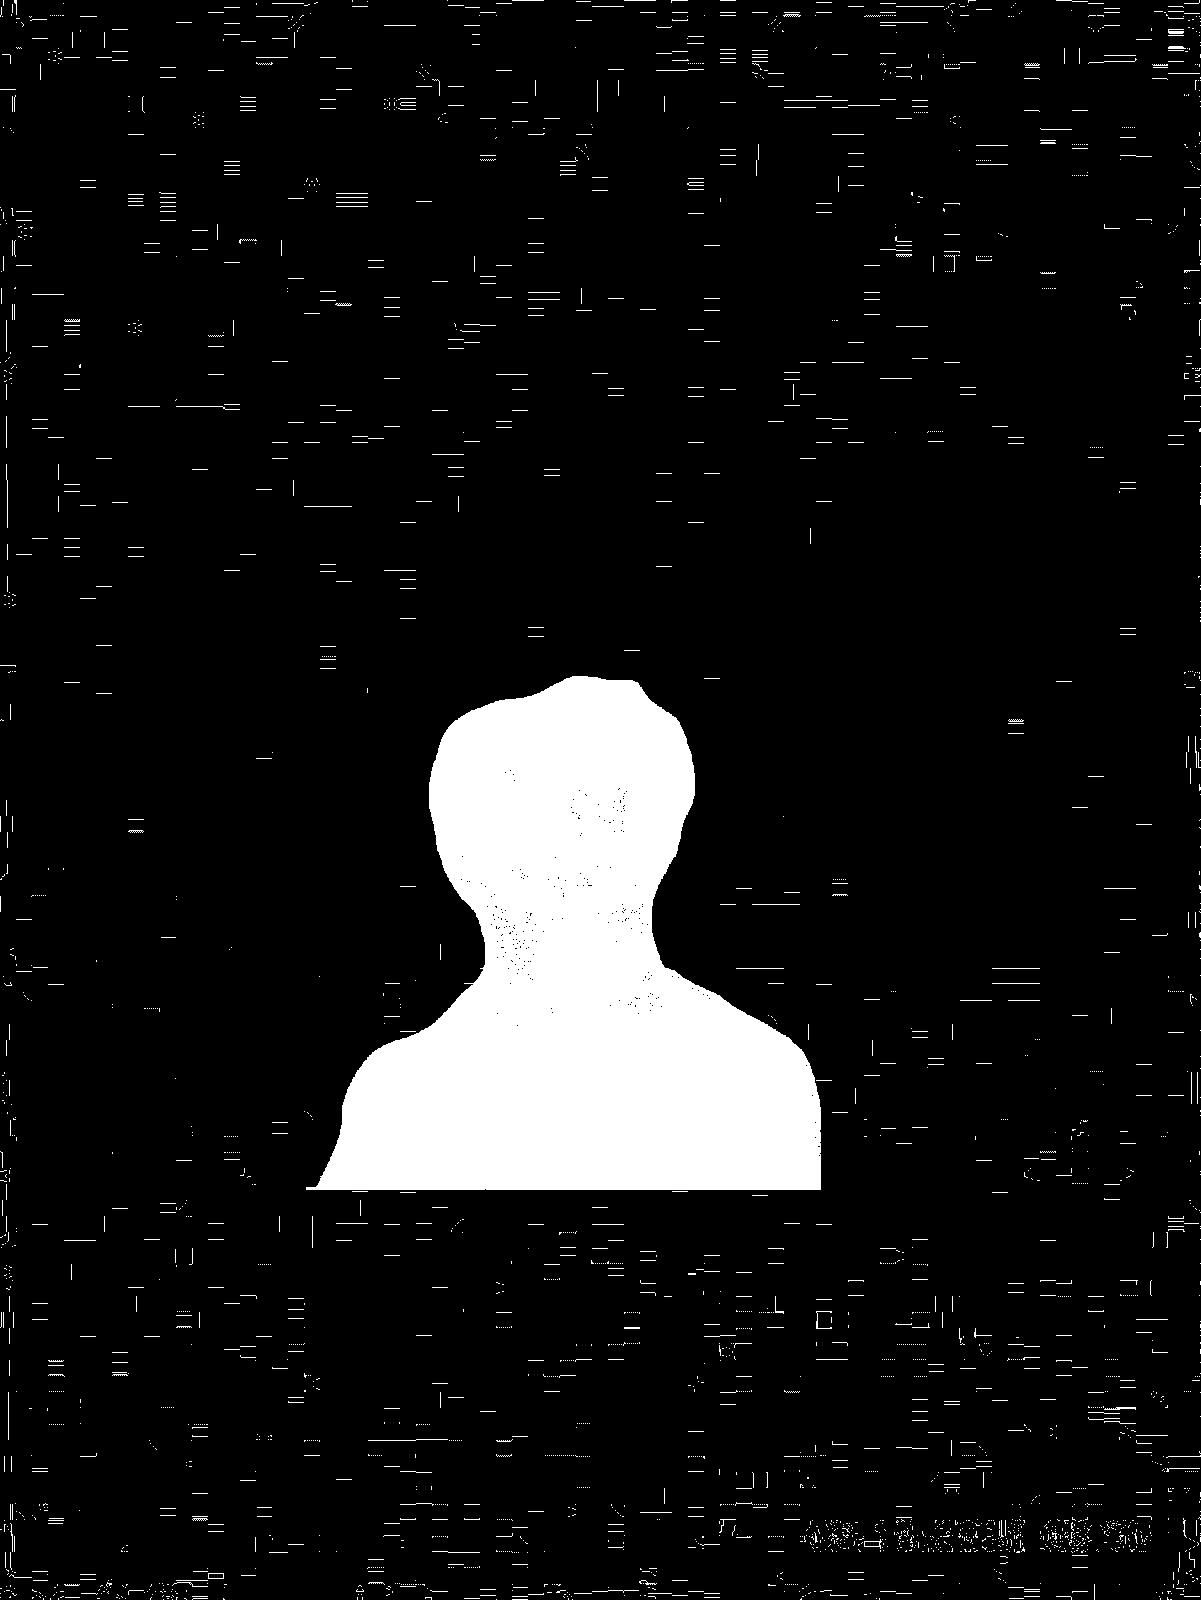

In [5]:
th, dst = cv.threshold(diff_abs, 0, 255, cv.THRESH_BINARY);
cv2_imshow(dst)

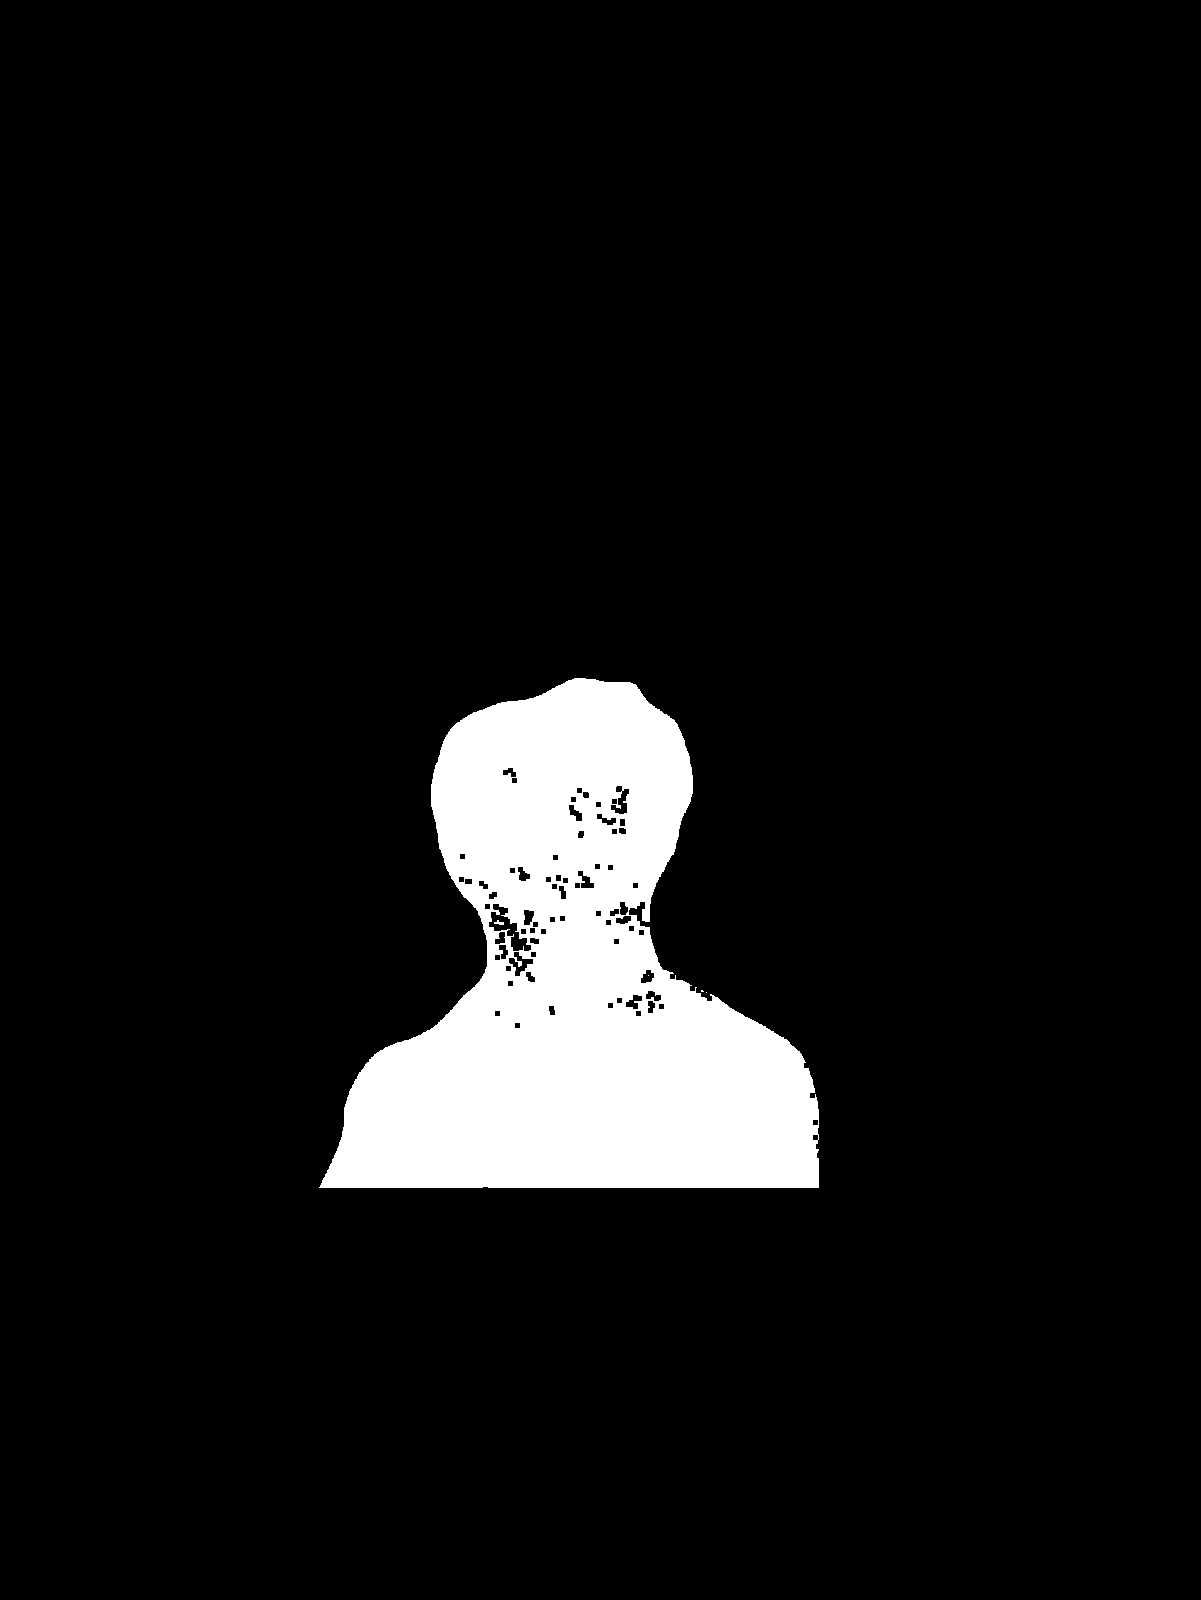

In [6]:
kernel = np.ones((5, 5), 'uint8')

erosion = cv.morphologyEx(dst, cv.MORPH_OPEN, kernel)
erotic = cv.erode(erosion, kernel)
cv2_imshow(erotic)

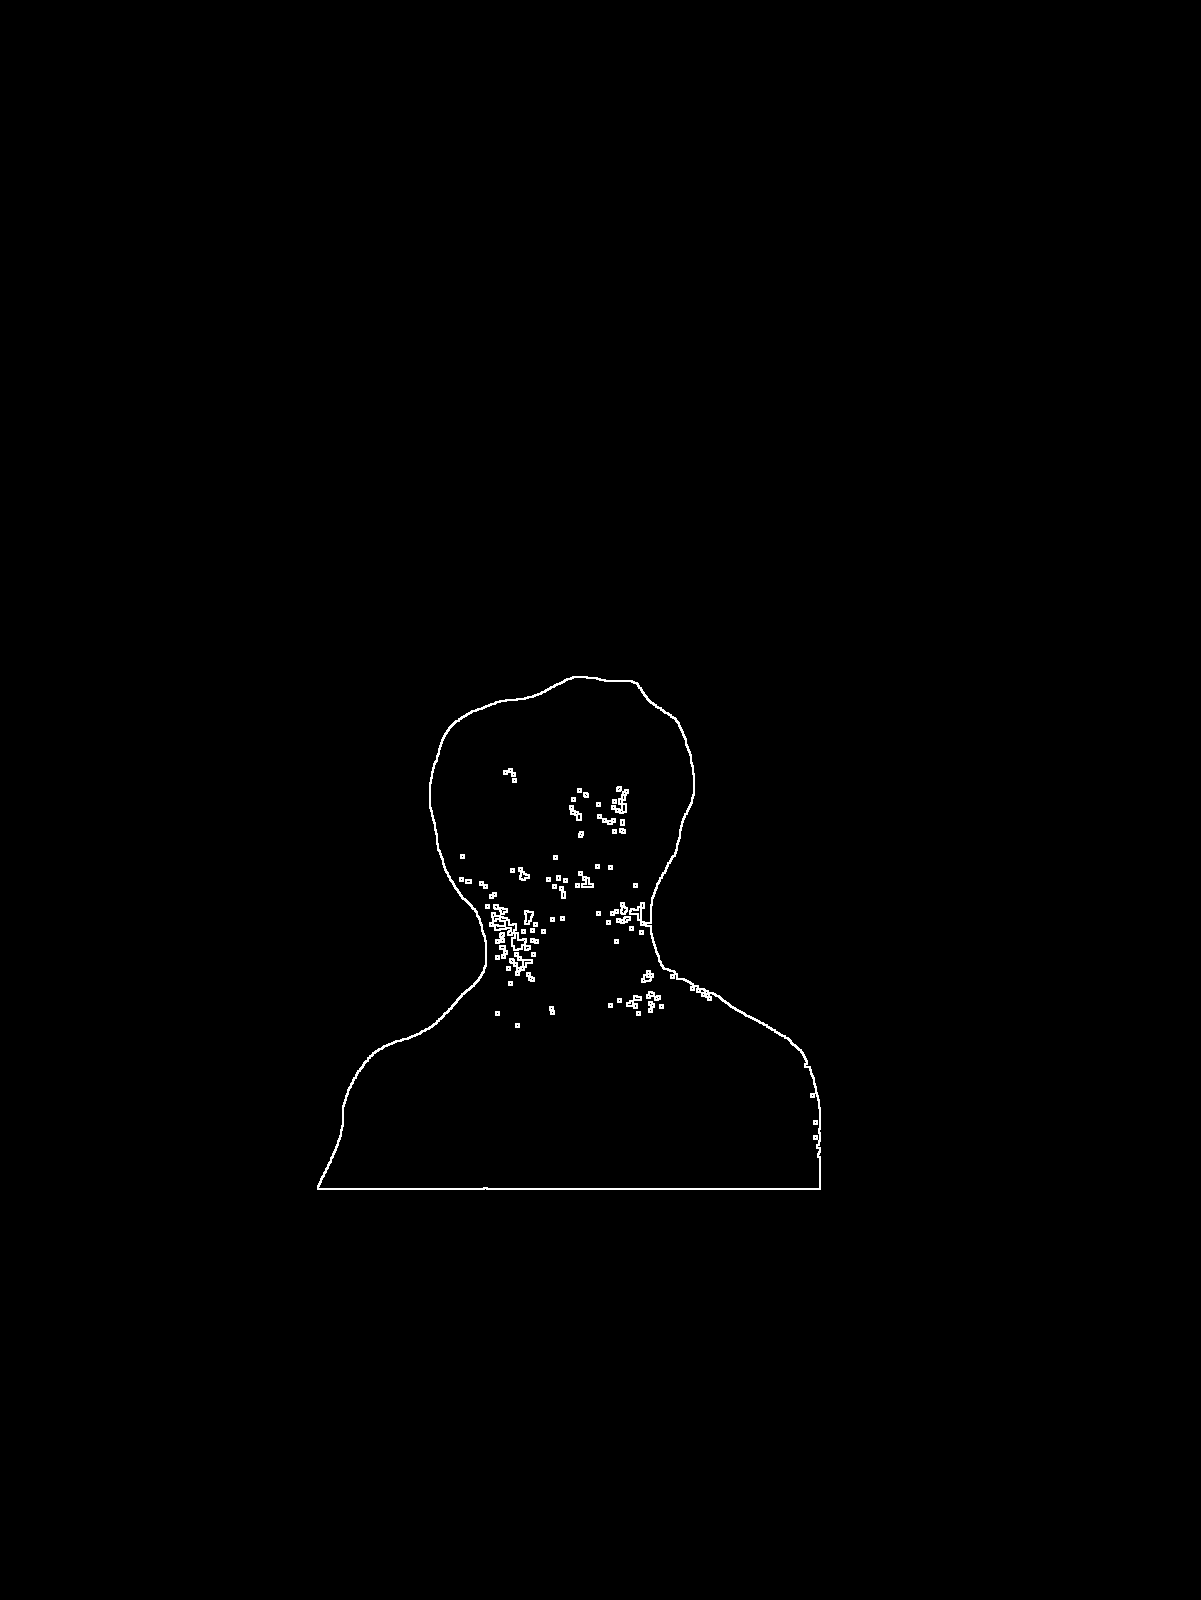

In [7]:
border = cv.bitwise_xor(erotic, erosion)
cv2_imshow(border)

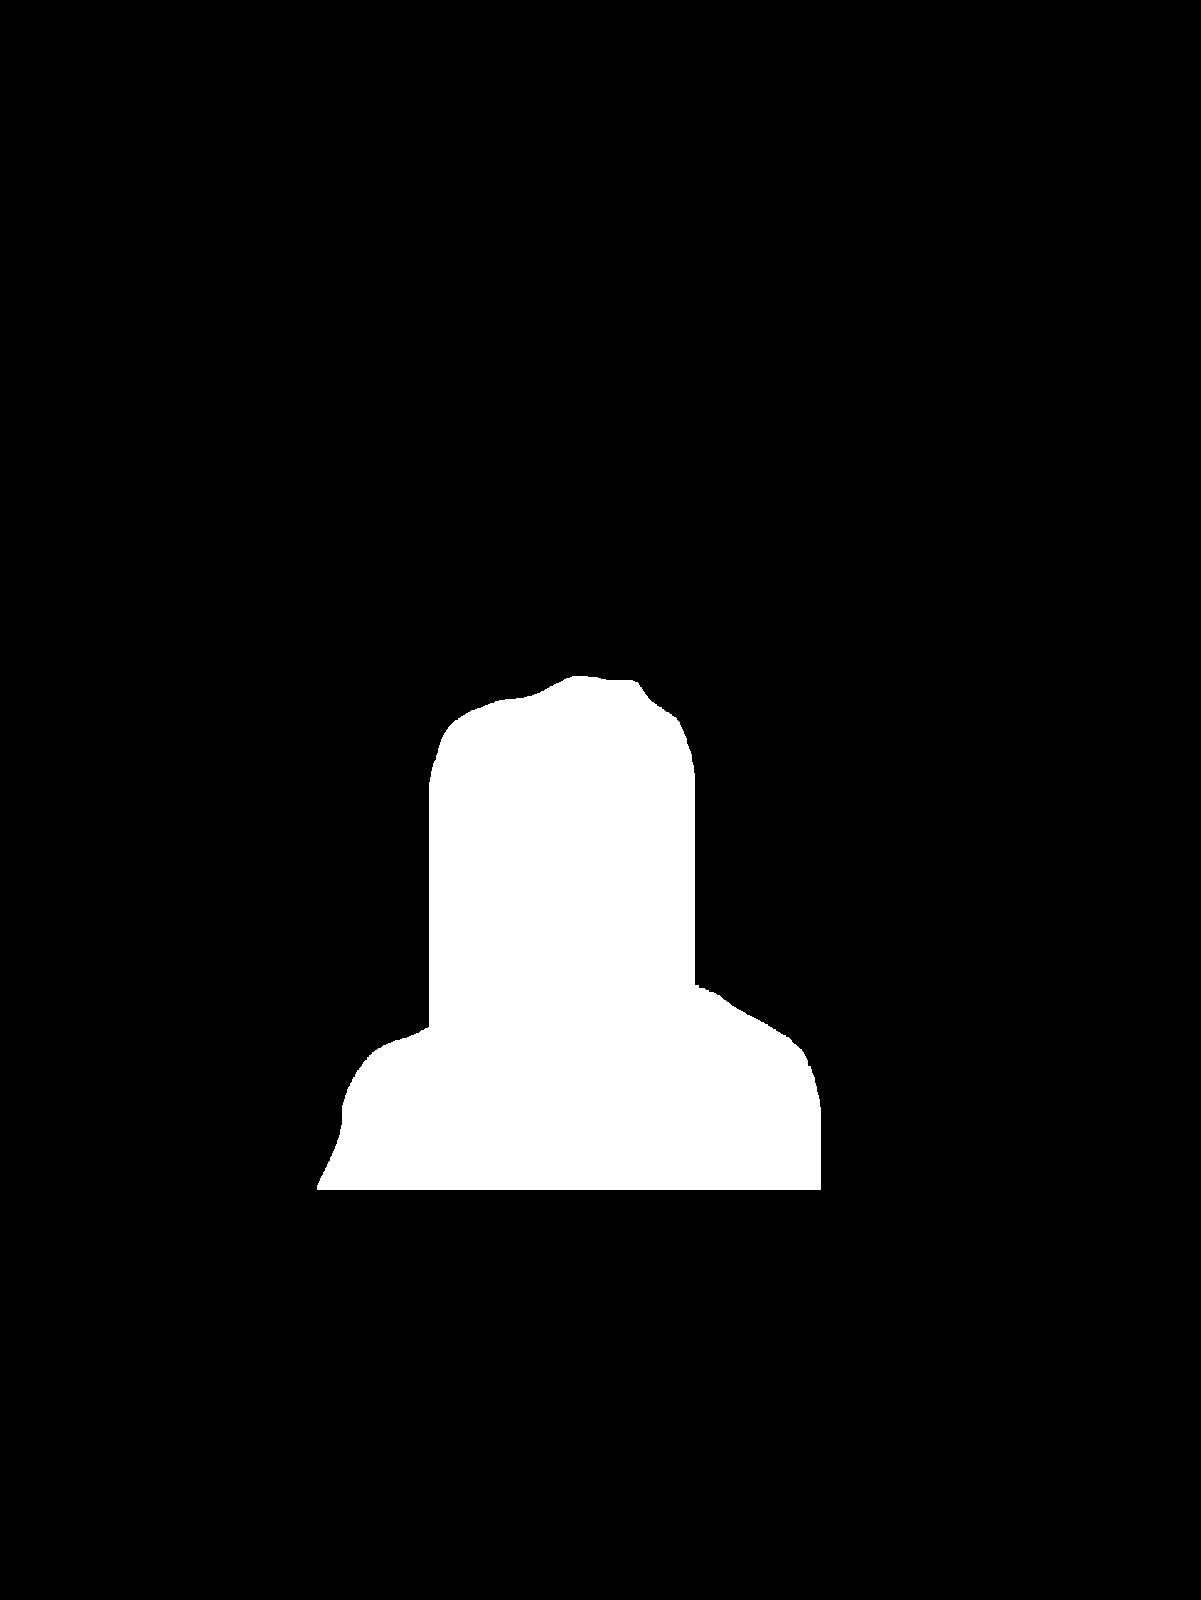

In [9]:
def updated_mask(image):
    height, width = image.shape
    for x in range(width):
        pixel = None
        for y in range(height):
            if(image[y, x] == 255):
                if pixel is not None:
                    for k in range(pixel, y):
                        image[k, x] = 255
                pixel = y
    for y in range(height):
        pixel = None
        for x in range(width):
            if(image[y, x] == 255):
                if pixel is not None:
                    for k in range(pixel, x):
                        image[y, k] = 255
                pixel = x
    return image
mask = updated_mask(border)

cv2_imshow(mask)

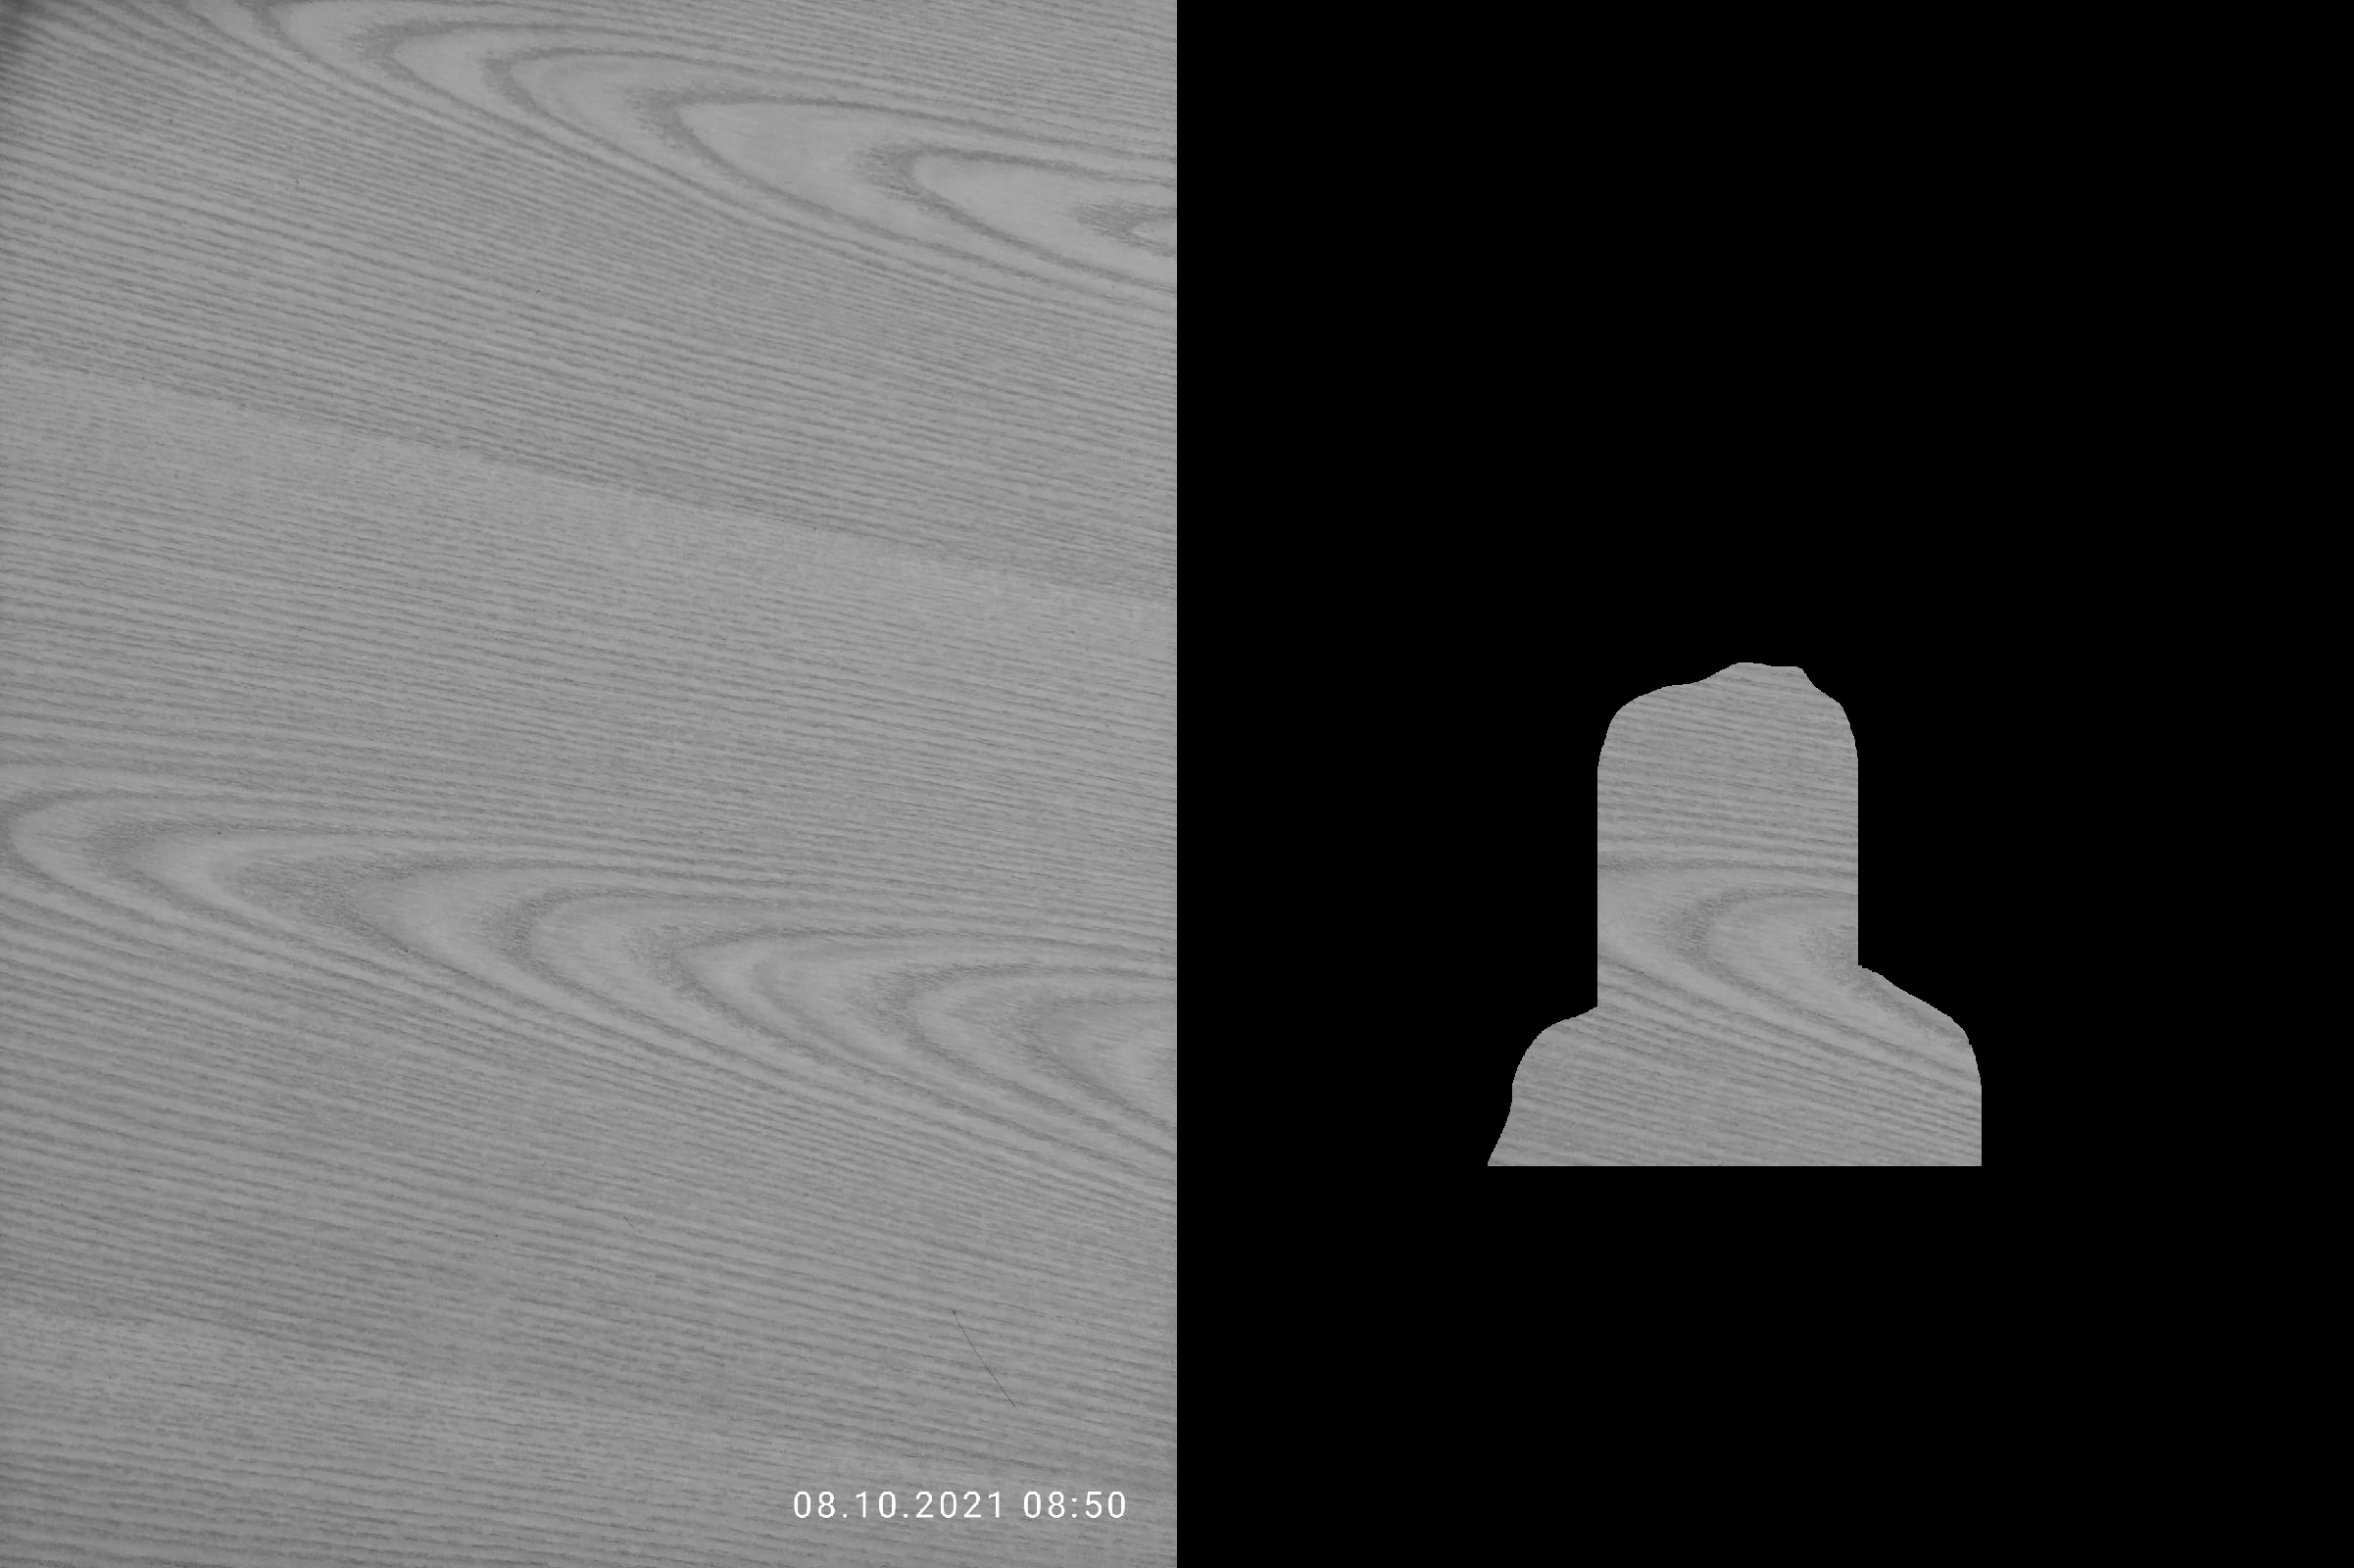

In [27]:
cv2_imshow(np.hstack((before,cv.copyTo(before,mask))))